In [1]:
import numpy as np
import os
import matplotlib
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.svm import SVC
import seaborn as sns
from collections import Counter
%matplotlib inline

In [2]:
#path=('./test')
path_1=os.path.join(os.getcwd())
train_img=[]
train_emotion=[]
test_img=[]
test_emotion=[]
y_predicted=[]
y_pred=[]
k=19

#for train path
def fetch_train():
    path_2=os.path.join(path_1,'train')           #if 'train',then we will go to train folder ,same for test case.
    
    for i in os.listdir(path_2):                  #looping for every image in the the path_2 folder/address. 
        img_path=os.path.join(path_2,i)           #joining the path of image
        image_toarr = plt.imread(img_path)        #converting it to array 
        train_img.append(image_toarr.reshape(-1))  #appending images to list 

        if i.split(".")[1]=='happy':     #appending there emotion if it is happy ,then appending 1 and if sad then appending 0.
            train_emotion.append(1)
        elif i.split(".")[1]=='sad':
            train_emotion.append(0)
    return np.array(train_img),np.array(train_emotion)       #returning the dataset



#for test path

def fetch_test():
    path_2=os.path.join(path_1,'test')        
    
    for i in os.listdir(path_2):                       #looping for every image in the the path_2 folder/address. 
        img_path=os.path.join(path_2,i)    #joining the path of image
        image_toarr = plt.imread(img_path) #converting it to array 
        test_img.append(image_toarr.reshape(-1))   #appending images to list 

        if i.split(".")[1]=='happy':     #appending there emotion if it is happy ,then appending 1 and if sad then appending 0.
            test_emotion.append(1)
        elif i.split(".")[1]=='sad':
            test_emotion.append(0)
    return np.array(test_img),np.array(test_emotion)       #returning the dataset





x_train,y_train=fetch_train()                          #fetching the training data
x_test,y_test=fetch_test()                             #fetcing the testing data
x_size=x_train.shape[0]                                #size of training data
x_test_size=x_test.shape[0]



print("\nthe dimension of X_test  before applying pca is :",x_test.shape)               #dim (10,10201)
print("the dimension of X_train before applying pca is :",x_train.shape)             #dim (20,10201)


print("\nthe dimension of y_test that is labels of test dataset :",y_test.shape)               #dim (10,)
print("the dimension of y_train that is labels of train dataset :",y_train.shape)             #dim (20,)


#print(len(y_test))
#print(x_train.shape)
#print(y_train.shape)
#print(x_test.shape)
#print(y_test.shape)


the dimension of X_test  before applying pca is : (10, 10201)
the dimension of X_train before applying pca is : (20, 10201)

the dimension of y_test that is labels of test dataset : (10,)
the dimension of y_train that is labels of train dataset : (20,)


In [3]:
#looping for different kernel 

kernel=['linear','rbf','sigmoid']
C=[0.2,1,10,100,500 ]
epsi=[0.1,0.001,0.0001,0.00003]

missclassification_linear=[]     #a list to store number of missclassified samples(minimum among all combinations of epsi and c) in linear kernel for a particular k(pca dim)
missclassification_rbf=[]       #same as above comment for rbf
missclassification_sigmoid=[]
k_pca=[] 

for k in range (10,20):
    k_pca.append(k)

for ker in kernel:
    print("\n\n\n\n Kernel =",ker);
    print("\n");

    for k in range (10,20):
        print("No. of Pca components ",k)
        minimum_atk=len(y_test)
        pca = PCA(n_components=k)
        pca.fit(x_train)
        X_train=pca.transform(x_train)
        X_test=pca.transform(x_test)

        for c in C:
            for e in epsi:
                clf=SVC(kernel=ker,random_state=0,C=c,tol=e)
                clf=clf.fit(X_train,y_train)
                y_pred=clf.predict(X_test)
                
                acurracy=sum(y_pred==y_test)
                misclassified=sum(y_pred!=y_test)
                size=len(y_test)
                acc=acurracy/size
                print("penalty ",format(c,".2f"),"\t\t tolerance",format(e,".2f"),"\t\t Accuracy",format(acc,".2f"),"\t\t misclassified",format(misclassified,".2f"))
                
                
                if(misclassified < minimum_atk):                     #taking out minimum for a particular k value (considering all combinations of C and epsi)
                    minimum_atk=misclassified


        print(" \nminimum classification for pca component k ",k,"=",minimum_atk)
        print("\n")
        if(ker=='linear'):
            missclassification_linear.append(minimum_atk)
        elif(ker=='rbf'):
            missclassification_rbf.append(minimum_atk)
        elif(ker=='sigmoid'):
            missclassification_sigmoid.append(minimum_atk)    





 Kernel = linear


No. of Pca components  10
penalty  0.20 		 tolerance 0.10 		 Accuracy 0.70 		 misclassified 3.00
penalty  0.20 		 tolerance 0.00 		 Accuracy 0.70 		 misclassified 3.00
penalty  0.20 		 tolerance 0.00 		 Accuracy 0.70 		 misclassified 3.00
penalty  0.20 		 tolerance 0.00 		 Accuracy 0.70 		 misclassified 3.00
penalty  1.00 		 tolerance 0.10 		 Accuracy 0.70 		 misclassified 3.00
penalty  1.00 		 tolerance 0.00 		 Accuracy 0.70 		 misclassified 3.00
penalty  1.00 		 tolerance 0.00 		 Accuracy 0.70 		 misclassified 3.00
penalty  1.00 		 tolerance 0.00 		 Accuracy 0.70 		 misclassified 3.00
penalty  10.00 		 tolerance 0.10 		 Accuracy 0.70 		 misclassified 3.00
penalty  10.00 		 tolerance 0.00 		 Accuracy 0.70 		 misclassified 3.00
penalty  10.00 		 tolerance 0.00 		 Accuracy 0.70 		 misclassified 3.00
penalty  10.00 		 tolerance 0.00 		 Accuracy 0.70 		 misclassified 3.00
penalty  100.00 		 tolerance 0.10 		 Accuracy 0.70 		 misclassified 3.00
penalty  100.00 		 tol

penalty  0.20 		 tolerance 0.10 		 Accuracy 0.90 		 misclassified 1.00
penalty  0.20 		 tolerance 0.00 		 Accuracy 0.90 		 misclassified 1.00
penalty  0.20 		 tolerance 0.00 		 Accuracy 0.90 		 misclassified 1.00
penalty  0.20 		 tolerance 0.00 		 Accuracy 0.90 		 misclassified 1.00
penalty  1.00 		 tolerance 0.10 		 Accuracy 0.90 		 misclassified 1.00
penalty  1.00 		 tolerance 0.00 		 Accuracy 0.90 		 misclassified 1.00
penalty  1.00 		 tolerance 0.00 		 Accuracy 0.90 		 misclassified 1.00
penalty  1.00 		 tolerance 0.00 		 Accuracy 0.90 		 misclassified 1.00
penalty  10.00 		 tolerance 0.10 		 Accuracy 0.90 		 misclassified 1.00
penalty  10.00 		 tolerance 0.00 		 Accuracy 0.90 		 misclassified 1.00
penalty  10.00 		 tolerance 0.00 		 Accuracy 0.90 		 misclassified 1.00
penalty  10.00 		 tolerance 0.00 		 Accuracy 0.90 		 misclassified 1.00
penalty  100.00 		 tolerance 0.10 		 Accuracy 0.90 		 misclassified 1.00
penalty  100.00 		 tolerance 0.00 		 Accuracy 0.90 		 misclassified 1.0

penalty  500.00 		 tolerance 0.10 		 Accuracy 0.80 		 misclassified 2.00
penalty  500.00 		 tolerance 0.00 		 Accuracy 0.80 		 misclassified 2.00
penalty  500.00 		 tolerance 0.00 		 Accuracy 0.80 		 misclassified 2.00
penalty  500.00 		 tolerance 0.00 		 Accuracy 0.80 		 misclassified 2.00
 
minimum classification for pca component k  14 = 2


No. of Pca components  15
penalty  0.20 		 tolerance 0.10 		 Accuracy 0.40 		 misclassified 6.00
penalty  0.20 		 tolerance 0.00 		 Accuracy 0.40 		 misclassified 6.00
penalty  0.20 		 tolerance 0.00 		 Accuracy 0.40 		 misclassified 6.00
penalty  0.20 		 tolerance 0.00 		 Accuracy 0.40 		 misclassified 6.00
penalty  1.00 		 tolerance 0.10 		 Accuracy 0.40 		 misclassified 6.00
penalty  1.00 		 tolerance 0.00 		 Accuracy 0.30 		 misclassified 7.00
penalty  1.00 		 tolerance 0.00 		 Accuracy 0.30 		 misclassified 7.00
penalty  1.00 		 tolerance 0.00 		 Accuracy 0.30 		 misclassified 7.00
penalty  10.00 		 tolerance 0.10 		 Accuracy 0.70 		 miscla

penalty  0.20 		 tolerance 0.00 		 Accuracy 0.40 		 misclassified 6.00
penalty  0.20 		 tolerance 0.00 		 Accuracy 0.40 		 misclassified 6.00
penalty  0.20 		 tolerance 0.00 		 Accuracy 0.40 		 misclassified 6.00
penalty  1.00 		 tolerance 0.10 		 Accuracy 0.60 		 misclassified 4.00
penalty  1.00 		 tolerance 0.00 		 Accuracy 0.60 		 misclassified 4.00
penalty  1.00 		 tolerance 0.00 		 Accuracy 0.60 		 misclassified 4.00
penalty  1.00 		 tolerance 0.00 		 Accuracy 0.60 		 misclassified 4.00
penalty  10.00 		 tolerance 0.10 		 Accuracy 0.90 		 misclassified 1.00
penalty  10.00 		 tolerance 0.00 		 Accuracy 0.90 		 misclassified 1.00
penalty  10.00 		 tolerance 0.00 		 Accuracy 0.90 		 misclassified 1.00
penalty  10.00 		 tolerance 0.00 		 Accuracy 0.90 		 misclassified 1.00
penalty  100.00 		 tolerance 0.10 		 Accuracy 0.80 		 misclassified 2.00
penalty  100.00 		 tolerance 0.00 		 Accuracy 0.80 		 misclassified 2.00
penalty  100.00 		 tolerance 0.00 		 Accuracy 0.80 		 misclassified 2

penalty  1.00 		 tolerance 0.00 		 Accuracy 0.60 		 misclassified 4.00
penalty  10.00 		 tolerance 0.10 		 Accuracy 0.90 		 misclassified 1.00
penalty  10.00 		 tolerance 0.00 		 Accuracy 0.90 		 misclassified 1.00
penalty  10.00 		 tolerance 0.00 		 Accuracy 0.90 		 misclassified 1.00
penalty  10.00 		 tolerance 0.00 		 Accuracy 0.90 		 misclassified 1.00
penalty  100.00 		 tolerance 0.10 		 Accuracy 0.80 		 misclassified 2.00
penalty  100.00 		 tolerance 0.00 		 Accuracy 0.80 		 misclassified 2.00
penalty  100.00 		 tolerance 0.00 		 Accuracy 0.80 		 misclassified 2.00
penalty  100.00 		 tolerance 0.00 		 Accuracy 0.80 		 misclassified 2.00
penalty  500.00 		 tolerance 0.10 		 Accuracy 0.80 		 misclassified 2.00
penalty  500.00 		 tolerance 0.00 		 Accuracy 0.80 		 misclassified 2.00
penalty  500.00 		 tolerance 0.00 		 Accuracy 0.80 		 misclassified 2.00
penalty  500.00 		 tolerance 0.00 		 Accuracy 0.80 		 misclassified 2.00
 
minimum classification for pca component k  19 = 1




In [4]:
k_pca=np.array(k_pca)
print(k_pca.shape)

missclassification_linear=np.array(missclassification_linear)
print(missclassification_linear.shape)

(10,)
(10,)


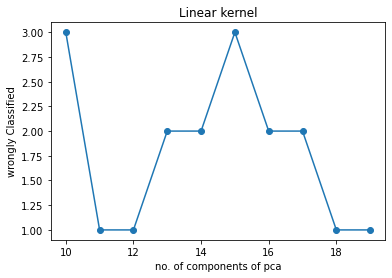

In [5]:
#plotting for rbf kernel .(component of pca vs accuracy scatter plot)

matplotlib.pyplot.scatter(k_pca, missclassification_linear)
matplotlib.pyplot.plot(k_pca, missclassification_linear)
plt.xlabel("no. of components of pca")
plt.ylabel("wrongly Classified")
plt.title("Linear kernel")
plt.savefig('4_linear.png')

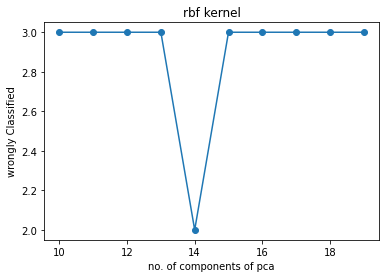

In [6]:
#plotting for rbf kernel .(component of pca vs accuracy scatter plot)

matplotlib.pyplot.scatter(k_pca, missclassification_rbf)
matplotlib.pyplot.plot(k_pca, missclassification_rbf)
plt.xlabel("no. of components of pca")
plt.ylabel("wrongly Classified")
plt.title("rbf kernel")
plt.savefig('4_rbf.png')

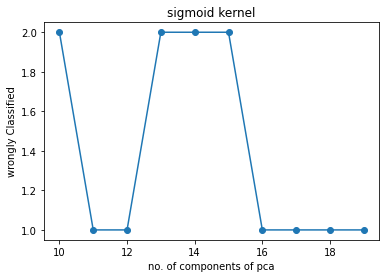

In [7]:
#plotting for sigmoid kernel .(component of pca vs accuracy scatter plot)

matplotlib.pyplot.scatter(k_pca, missclassification_sigmoid)
matplotlib.pyplot.plot(k_pca, missclassification_sigmoid)
plt.xlabel("no. of components of pca")
plt.ylabel("wrongly Classified")
plt.title("sigmoid kernel")
plt.savefig('4_sigmoid.png')

In [8]:
#looping for polynomial kernel with different degrees



degrees=[1,2,5,8,10]      #a list, which contains degrees of polynomial
C=[0.2,1, 10, 100, 500]
epsi=[0.1,0.001,0.0001,0.00003]
#pca_cm=[2,4,6,8,12,14,16,19]
missclassification_poly1=[]
missclassification_poly2=[]
missclassification_poly5=[]
missclassification_poly8=[]
missclassification_poly10=[]


for d in degrees:
    print("\n\n\n\n polynomial for degree =",d);
    print("\n");

    for k in range (10,20):
        print("No. of Pca components",k)
        minimum_atk=len(y_test)
        pca = PCA(n_components=k)
        pca.fit(x_train)
        X_train=pca.transform(x_train)
        X_test=pca.transform(x_test)

        for c in C:
            for e in epsi:
                clf=SVC(kernel='poly',random_state=0,C=c,tol=e,degree=d).fit(X_train,y_train)
                y_pred=clf.predict(X_test)
                
                acurracy=sum(y_pred==y_test)
                misclassified=sum(y_pred!=y_test)
                size=len(y_test)
                acc=acurracy/size
                print("penalty ",format(c,".2f"),"\t\t tolerance",format(e,".2f"),"\t\t Accuracy",format(acc,".2f"),"\t\t misclassified",format(misclassified,".2f"))
                
    
                if(misclassified < minimum_atk):                     #taking out minimum for a particular k value (considering all combinations of C and epsi)
                    minimum_atk=misclassified


        print(minimum_atk)
        if(d==1):
            missclassification_poly1.append(minimum_atk)
        elif(d==2):
            missclassification_poly2.append(minimum_atk)
        elif(d==5):
            missclassification_poly5.append(minimum_atk)
        elif(d==8):
            missclassification_poly8.append(minimum_atk)
        else:
            missclassification_poly10.append(minimum_atk)





 polynomial for degree = 1


No. of Pca components 10
penalty  0.20 		 tolerance 0.10 		 Accuracy 0.40 		 misclassified 6.00
penalty  0.20 		 tolerance 0.00 		 Accuracy 0.40 		 misclassified 6.00
penalty  0.20 		 tolerance 0.00 		 Accuracy 0.40 		 misclassified 6.00
penalty  0.20 		 tolerance 0.00 		 Accuracy 0.40 		 misclassified 6.00
penalty  1.00 		 tolerance 0.10 		 Accuracy 0.60 		 misclassified 4.00
penalty  1.00 		 tolerance 0.00 		 Accuracy 0.60 		 misclassified 4.00
penalty  1.00 		 tolerance 0.00 		 Accuracy 0.60 		 misclassified 4.00
penalty  1.00 		 tolerance 0.00 		 Accuracy 0.60 		 misclassified 4.00
penalty  10.00 		 tolerance 0.10 		 Accuracy 0.70 		 misclassified 3.00
penalty  10.00 		 tolerance 0.00 		 Accuracy 0.70 		 misclassified 3.00
penalty  10.00 		 tolerance 0.00 		 Accuracy 0.70 		 misclassified 3.00
penalty  10.00 		 tolerance 0.00 		 Accuracy 0.70 		 misclassified 3.00
penalty  100.00 		 tolerance 0.10 		 Accuracy 0.80 		 misclassified 2.00
penalty  100.

penalty  0.20 		 tolerance 0.10 		 Accuracy 0.40 		 misclassified 6.00
penalty  0.20 		 tolerance 0.00 		 Accuracy 0.40 		 misclassified 6.00
penalty  0.20 		 tolerance 0.00 		 Accuracy 0.40 		 misclassified 6.00
penalty  0.20 		 tolerance 0.00 		 Accuracy 0.40 		 misclassified 6.00
penalty  1.00 		 tolerance 0.10 		 Accuracy 0.90 		 misclassified 1.00
penalty  1.00 		 tolerance 0.00 		 Accuracy 0.90 		 misclassified 1.00
penalty  1.00 		 tolerance 0.00 		 Accuracy 0.90 		 misclassified 1.00
penalty  1.00 		 tolerance 0.00 		 Accuracy 0.90 		 misclassified 1.00
penalty  10.00 		 tolerance 0.10 		 Accuracy 0.90 		 misclassified 1.00
penalty  10.00 		 tolerance 0.00 		 Accuracy 0.90 		 misclassified 1.00
penalty  10.00 		 tolerance 0.00 		 Accuracy 0.90 		 misclassified 1.00
penalty  10.00 		 tolerance 0.00 		 Accuracy 0.90 		 misclassified 1.00
penalty  100.00 		 tolerance 0.10 		 Accuracy 0.90 		 misclassified 1.00
penalty  100.00 		 tolerance 0.00 		 Accuracy 0.90 		 misclassified 1.0

penalty  500.00 		 tolerance 0.10 		 Accuracy 0.40 		 misclassified 6.00
penalty  500.00 		 tolerance 0.00 		 Accuracy 0.40 		 misclassified 6.00
penalty  500.00 		 tolerance 0.00 		 Accuracy 0.40 		 misclassified 6.00
penalty  500.00 		 tolerance 0.00 		 Accuracy 0.40 		 misclassified 6.00
6
No. of Pca components 15
penalty  0.20 		 tolerance 0.10 		 Accuracy 0.40 		 misclassified 6.00
penalty  0.20 		 tolerance 0.00 		 Accuracy 0.40 		 misclassified 6.00
penalty  0.20 		 tolerance 0.00 		 Accuracy 0.40 		 misclassified 6.00
penalty  0.20 		 tolerance 0.00 		 Accuracy 0.40 		 misclassified 6.00
penalty  1.00 		 tolerance 0.10 		 Accuracy 0.30 		 misclassified 7.00
penalty  1.00 		 tolerance 0.00 		 Accuracy 0.30 		 misclassified 7.00
penalty  1.00 		 tolerance 0.00 		 Accuracy 0.30 		 misclassified 7.00
penalty  1.00 		 tolerance 0.00 		 Accuracy 0.30 		 misclassified 7.00
penalty  10.00 		 tolerance 0.10 		 Accuracy 0.20 		 misclassified 8.00
penalty  10.00 		 tolerance 0.00 		 Accur

penalty  0.20 		 tolerance 0.10 		 Accuracy 0.30 		 misclassified 7.00
penalty  0.20 		 tolerance 0.00 		 Accuracy 0.40 		 misclassified 6.00
penalty  0.20 		 tolerance 0.00 		 Accuracy 0.40 		 misclassified 6.00
penalty  0.20 		 tolerance 0.00 		 Accuracy 0.40 		 misclassified 6.00
penalty  1.00 		 tolerance 0.10 		 Accuracy 0.50 		 misclassified 5.00
penalty  1.00 		 tolerance 0.00 		 Accuracy 0.50 		 misclassified 5.00
penalty  1.00 		 tolerance 0.00 		 Accuracy 0.50 		 misclassified 5.00
penalty  1.00 		 tolerance 0.00 		 Accuracy 0.50 		 misclassified 5.00
penalty  10.00 		 tolerance 0.10 		 Accuracy 0.50 		 misclassified 5.00
penalty  10.00 		 tolerance 0.00 		 Accuracy 0.50 		 misclassified 5.00
penalty  10.00 		 tolerance 0.00 		 Accuracy 0.50 		 misclassified 5.00
penalty  10.00 		 tolerance 0.00 		 Accuracy 0.50 		 misclassified 5.00
penalty  100.00 		 tolerance 0.10 		 Accuracy 0.40 		 misclassified 6.00
penalty  100.00 		 tolerance 0.00 		 Accuracy 0.40 		 misclassified 6.0

penalty  0.20 		 tolerance 0.00 		 Accuracy 0.30 		 misclassified 7.00
penalty  0.20 		 tolerance 0.00 		 Accuracy 0.30 		 misclassified 7.00
penalty  0.20 		 tolerance 0.00 		 Accuracy 0.30 		 misclassified 7.00
penalty  1.00 		 tolerance 0.10 		 Accuracy 0.40 		 misclassified 6.00
penalty  1.00 		 tolerance 0.00 		 Accuracy 0.40 		 misclassified 6.00
penalty  1.00 		 tolerance 0.00 		 Accuracy 0.40 		 misclassified 6.00
penalty  1.00 		 tolerance 0.00 		 Accuracy 0.40 		 misclassified 6.00
penalty  10.00 		 tolerance 0.10 		 Accuracy 0.40 		 misclassified 6.00
penalty  10.00 		 tolerance 0.00 		 Accuracy 0.40 		 misclassified 6.00
penalty  10.00 		 tolerance 0.00 		 Accuracy 0.40 		 misclassified 6.00
penalty  10.00 		 tolerance 0.00 		 Accuracy 0.40 		 misclassified 6.00
penalty  100.00 		 tolerance 0.10 		 Accuracy 0.40 		 misclassified 6.00
penalty  100.00 		 tolerance 0.00 		 Accuracy 0.40 		 misclassified 6.00
penalty  100.00 		 tolerance 0.00 		 Accuracy 0.40 		 misclassified 6

penalty  0.20 		 tolerance 0.10 		 Accuracy 0.40 		 misclassified 6.00
penalty  0.20 		 tolerance 0.00 		 Accuracy 0.40 		 misclassified 6.00
penalty  0.20 		 tolerance 0.00 		 Accuracy 0.40 		 misclassified 6.00
penalty  0.20 		 tolerance 0.00 		 Accuracy 0.40 		 misclassified 6.00
penalty  1.00 		 tolerance 0.10 		 Accuracy 0.40 		 misclassified 6.00
penalty  1.00 		 tolerance 0.00 		 Accuracy 0.40 		 misclassified 6.00
penalty  1.00 		 tolerance 0.00 		 Accuracy 0.40 		 misclassified 6.00
penalty  1.00 		 tolerance 0.00 		 Accuracy 0.40 		 misclassified 6.00
penalty  10.00 		 tolerance 0.10 		 Accuracy 0.40 		 misclassified 6.00
penalty  10.00 		 tolerance 0.00 		 Accuracy 0.40 		 misclassified 6.00
penalty  10.00 		 tolerance 0.00 		 Accuracy 0.40 		 misclassified 6.00
penalty  10.00 		 tolerance 0.00 		 Accuracy 0.40 		 misclassified 6.00
penalty  100.00 		 tolerance 0.10 		 Accuracy 0.30 		 misclassified 7.00
penalty  100.00 		 tolerance 0.00 		 Accuracy 0.30 		 misclassified 7.0

penalty  0.20 		 tolerance 0.10 		 Accuracy 0.40 		 misclassified 6.00
penalty  0.20 		 tolerance 0.00 		 Accuracy 0.40 		 misclassified 6.00
penalty  0.20 		 tolerance 0.00 		 Accuracy 0.40 		 misclassified 6.00
penalty  0.20 		 tolerance 0.00 		 Accuracy 0.40 		 misclassified 6.00
penalty  1.00 		 tolerance 0.10 		 Accuracy 0.40 		 misclassified 6.00
penalty  1.00 		 tolerance 0.00 		 Accuracy 0.40 		 misclassified 6.00
penalty  1.00 		 tolerance 0.00 		 Accuracy 0.40 		 misclassified 6.00
penalty  1.00 		 tolerance 0.00 		 Accuracy 0.40 		 misclassified 6.00
penalty  10.00 		 tolerance 0.10 		 Accuracy 0.40 		 misclassified 6.00
penalty  10.00 		 tolerance 0.00 		 Accuracy 0.40 		 misclassified 6.00
penalty  10.00 		 tolerance 0.00 		 Accuracy 0.40 		 misclassified 6.00
penalty  10.00 		 tolerance 0.00 		 Accuracy 0.40 		 misclassified 6.00
penalty  100.00 		 tolerance 0.10 		 Accuracy 0.40 		 misclassified 6.00
penalty  100.00 		 tolerance 0.00 		 Accuracy 0.40 		 misclassified 6.0

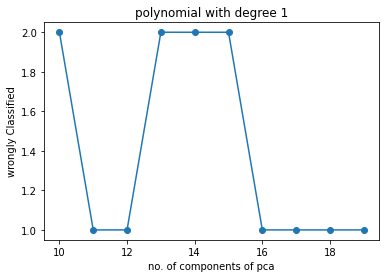

In [9]:
#plotting for sigmoid kernel .(component of pca vs accuracy scatter plot)

matplotlib.pyplot.scatter(k_pca, missclassification_poly1)
matplotlib.pyplot.plot(k_pca, missclassification_poly1)
plt.xlabel("no. of components of pca")
plt.ylabel("wrongly Classified")
plt.title("polynomial with degree 1")
plt.savefig('4_missclassification_poly1.png')

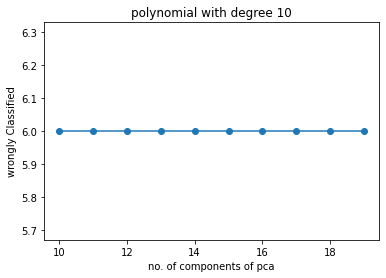

In [10]:
#plotting for sigmoid kernel .(component of pca vs accuracy scatter plot)

matplotlib.pyplot.scatter(k_pca, missclassification_poly10)
matplotlib.pyplot.plot(k_pca, missclassification_poly10)
plt.xlabel("no. of components of pca")
plt.ylabel("wrongly Classified")
plt.title("polynomial with degree 10")
plt.savefig('4_missclassification_poly10.png')

### Lda implementation

In [11]:
pca = PCA(n_components=10)
pca.fit(x_train)
X_train=pca.transform(x_train)
X_test=pca.transform(x_test)


In [12]:
pca_k_train_x=X_train
pca_k_test_x=X_test
# class means
M0 = pca_k_train_x[y_train == 0].mean(axis=0)
M1 = pca_k_train_x[y_train == 1].mean(axis=0)

In [13]:
# between class scatter matrix
S_b = np.outer((M1 - M0), (M1 - M0).T)

In [14]:
# within class scatter matrix
S_w = np.zeros_like(S_b)
for i, sample in enumerate(pca_k_train_x):
    if y_train[i] == 0:
        S_w = S_w + np.outer((sample - M0), (sample - M0).T)
    else:
        S_w = S_w + np.outer((sample - M1), (sample - M1).T)

In [15]:
'''The following is a slightly different approach for finding the projection vector'''
# for linear projection constants don't make a difference, so
# W = lambda (inv(S_w) @ S_b @ W)
# S_b @ W = (M1 - M0) @ (M1 - M0).T @ W = k (M1 - M0), where k = (m1 - m0)
# Thus, W = inv(S_w) @ (M1 - M0)
W = np.matmul(np.linalg.inv(S_w), (M1 - M0).reshape(-1, 1))

In [16]:
lda_train_x = np.matmul(pca_k_train_x, W).reshape(-1)
lda_test_x = np.matmul(pca_k_test_x, W).reshape(-1)

In [17]:
# find max and min value for the projected value of each class
max_0, min_0 = np.max(lda_train_x[y_train == 0]), np.min(lda_train_x[y_train == 0])
max_1, min_1 = np.max(lda_train_x[y_train == 1]), np.min(lda_train_x[y_train == 1])

In [18]:
# maximum separability threshold - heuristic
threshold_start, threshold_end = min(max_0, max_1), max(min_0, min_1)
optimal_threshold = (threshold_start + threshold_end) / 2
# threshold value after multiple runs with different values of K
# can be seen to be closer to 0. 
# Using optimal_threshold = 0 is thus a better choice than using the
# above heuristic

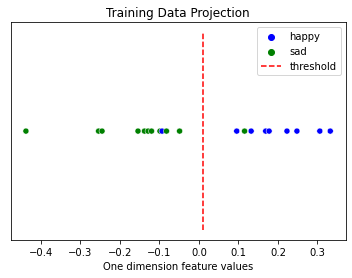

In [19]:
sns.scatterplot(x=lda_train_x, y=[0]*len(y_train), hue=['happy' if s_class == 1 else 'sad' for s_class in y_train], palette=['blue', 'green'])
plt.vlines(optimal_threshold, -1, 1, colors='r', linestyles='--', label='threshold')
plt.xlabel('One dimension feature values')
plt.yticks([])
plt.title('Training Data Projection')
plt.legend()
plt.savefig('lda_train.png')
plt.show()

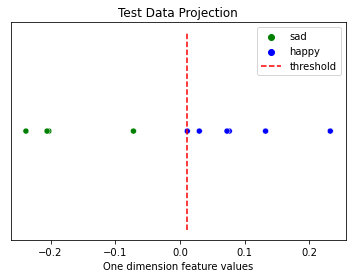

In [20]:


sns.scatterplot(x=lda_test_x, y=[0]*len(y_test), hue=['happy' if s_class == 1 else 'sad' for s_class in y_test], palette=['green', 'blue'])
plt.vlines(optimal_threshold, -1, 1, colors='r', linestyles='--', label='threshold')
plt.xlabel('One dimension feature values')
plt.yticks([])
plt.title('Test Data Projection')
plt.legend()
plt.savefig('lda_test.png')
plt.show()

In [21]:
# find which side of the threshold majority of a particular label resides
class_1_train_labels = Counter([1 if sample_class >= optimal_threshold else -1
                                    for sample_class in lda_train_x[y_train == 1]])
class_1_majority = class_1_train_labels.most_common()[0][0]

In [22]:
classification_test_labels = [1 if class_1_majority * sample_class >= class_1_majority * optimal_threshold else 0 
                                  for sample_class in lda_test_x]
accuracy = sum([yhat == y for yhat, y in zip(classification_test_labels, y_test)]) / len(y_test) * 100
accuracy

100.0

### Observation
 
### for linear classifier ,on varying the value of components in linear kernel we encounter least missclassification as 1 and maximum misclassification as 3.

### for rbf kernel ,on varying the value of components in rbf kernel we encounter least missclassification as 2 and maximum misclassification as 3.

### for sigmoid kernel ,on varying the value of components in sigmoid kernel we encounter least missclassification as 1 and maximum misclassification as 2.


### on comparing rbf and linear ,linear performs far better than rbf and sigmoid . wheareas sigmoid is better than rbf


### for polynomial kernel with different degrees , polynomial with degree 10 is missclassifying the same number for all K's , this is because the data is already overfitted ,hence not varying much with change in value of k.

### and for 1 degree polynomial,on varying the value of components in polynomial kernel we encounter least missclassification as 1 and maximum misclassification as 2.




## LDA VS SVM

### FOR This Particular data set ,LDA is better performing than svm for K=10(Pca component), rest for other K's it is approximately same as more or less missclassification is 1 ,2, or 3 .
### plot for test and train accuracy of lda is plotted above

### both of them are kind of simliar in performace in all the case ,because data is almost linearly separable, for 1 degree polynomial.